In [1]:
import sklearn; 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from scipy.stats import multivariate_normal
import scipy.stats as st
import scipy 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from helpers.iaml_cw2_helpers import *
from iaml212cw2_my_helpers import *
from matplotlib import rc
mpl.rcParams['font.size'] = 16
print(sklearn.__version__)

0.24.2


In [2]:

X, Y = load_Q1_dataset () 
print ( 'X: ' , X. shape , 'Y: ' , Y. shape )

Xtrn = X[ 100 : , : ] ; Ytrn = Y[ 100 : ]

Xtst = X[ 0 : 100 , : ] ; Ytst = Y[ 0 : 100 ]

X:  (800, 9) Y:  (800,)


# 1.1

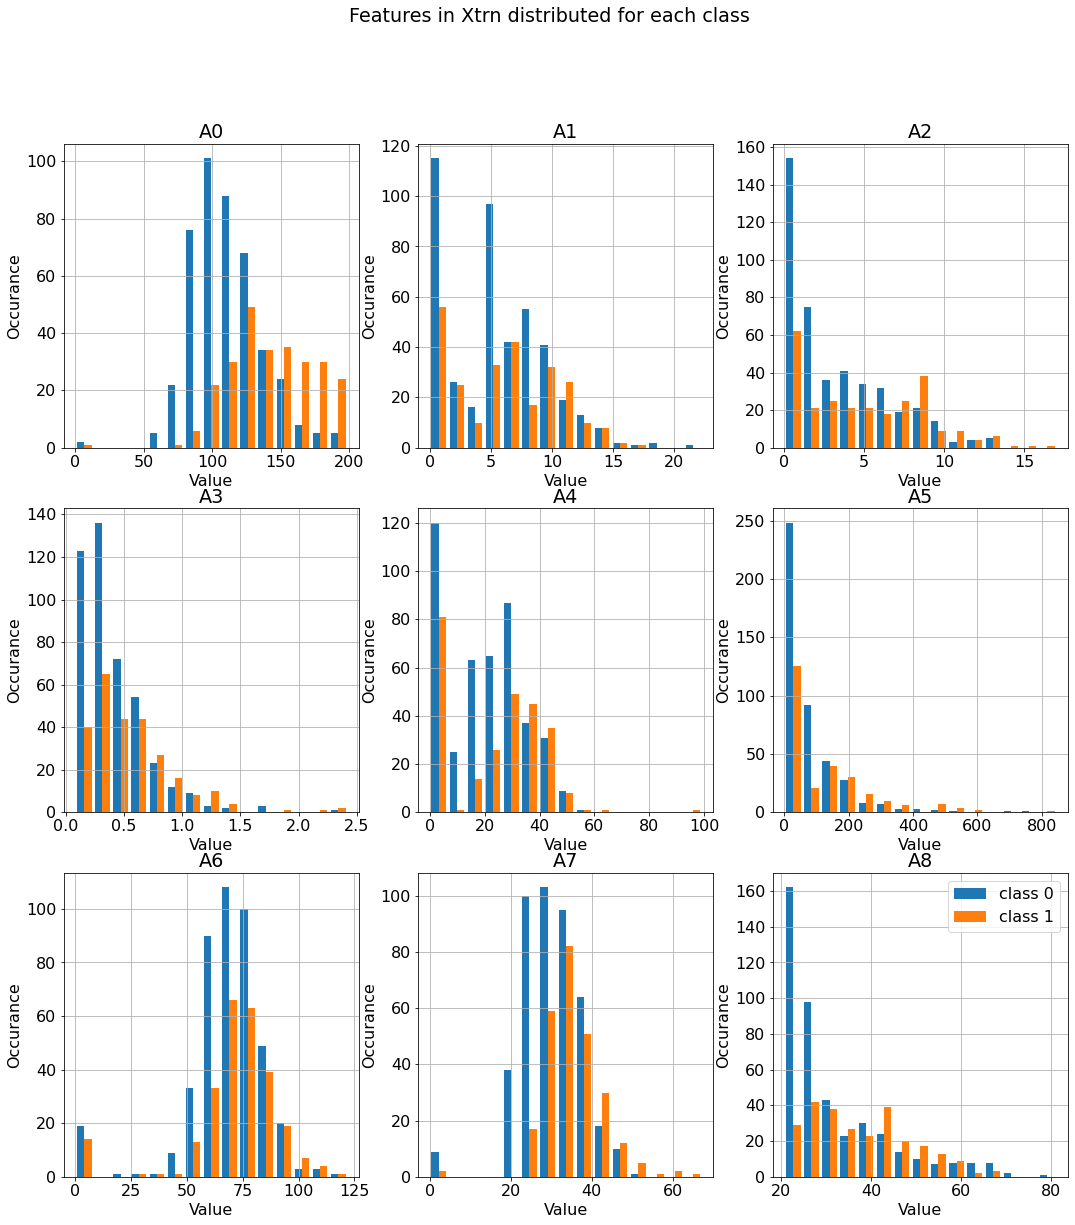

In [4]:
feature_grid = []

for i in range (0,9):
    
    idx0 = np.where(Ytrn == 0)
    row0 = Xtrn[:,i][idx0]
    
    idx1 = np.where(Ytrn == 1)
    row1 = Xtrn[:,i][idx1]
    
    feature_grid.append((row0, row1)) 

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18,19))
plt.suptitle('Features in Xtrn distributed for each class')

counter = 0
for row in ax:
    for col in row:
        Xa = feature_grid[counter][0]
        Xb = feature_grid[counter][1]
        col.hist([Xa, Xb], bins=15)
        col.set_title('A' + str(counter))
        col.set_xlabel('Value')
        col.set_ylabel('Occurance')
        col.grid()
        counter += 1

plt.legend(['class 0', 'class 1'])
plt.show()   

In [5]:
idx = np.where(Ytrn == 0)
len(Xtrn[:,0][idx])

438

# 1.2

In [6]:
cors = []

for i in range (0,9):
    correlation = np.corrcoef(Xtrn[:,i], Ytrn)[1,0]
    cors.append(correlation)
    

dfQ2 = pd.DataFrame(columns=['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'])
dfQ2.loc['Ytrn'] = cors
dfQ2

,A0,A1,A2,A3,A4,A5,A6,A7,A8
Ytrn,0.491176,0.087406,0.227287,0.207366,0.10772,0.185671,0.076261,0.304454,0.240347


# 1.4

In [11]:
unb_vars = [] 

for i in range (0,9): 
    variance = np.var(Xtrn[:,i],ddof=1)
    unb_vars.append((variance, 'A'+ str(i)))
    
unb_vars.sort( reverse = True )
sum(p for p, q in unb_vars)

16645.63659972226

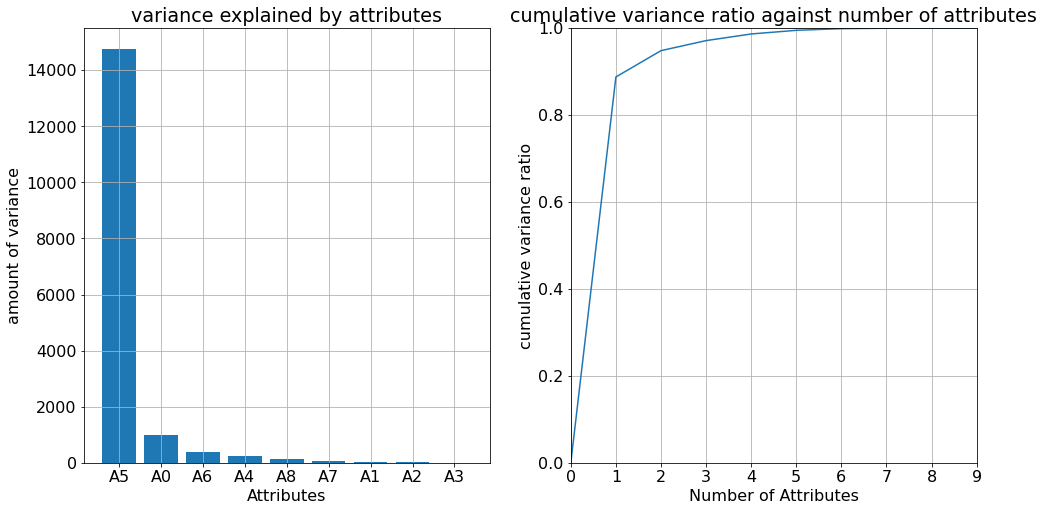

In [42]:
x = [unb_var[1] for unb_var in unb_vars]
y = [unb_var[0] for unb_var in unb_vars]
y_ratio = [one / sum(y) for one in y]
cum_y_ratio = np.cumsum (y_ratio)

fig = plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.bar(x, y)
plt.grid()
plt.xlabel('Attributes')
plt.ylabel('amount of variance')
plt.title('variance explained by attributes')

plt.subplot(1, 2, 2)
cum_y_ratio = np.insert(cum_y_ratio,0,0)
z = range (0,10)

plt.plot(z, cum_y_ratio)
plt.grid()
plt.xlabel('Number of Attributes')
plt.ylabel('cumulative variance ratio')
plt.title('cumulative variance ratio against number of attributes')
plt.xticks(z,z)
plt.ylim([0, 1])
plt.xlim([0,9])

plt.show()

# 1.5

In [43]:
# unbiased variance!!! 


pca = PCA()
projected = pca.fit_transform(Xtrn)
var = pca.explained_variance_
sum(var)

16645.636599722264

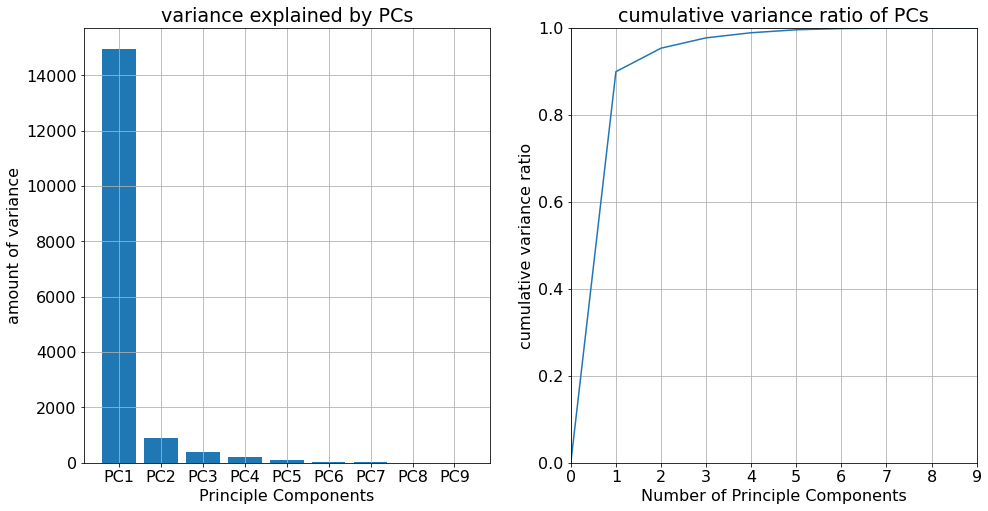

In [50]:
x_pc = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

cum_var_ratio = pca.explained_variance_ratio_.cumsum()
cum_var_ratio = np.insert(cum_var_ratio,0,0)
z_pc = range (0,10)

fig = plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.bar(x_pc, var)
plt.grid()
plt.xlabel('Principle Components')
plt.ylabel('amount of variance')
plt.title('variance explained by PCs')

plt.subplot(1, 2, 2)


plt.plot(z_pc, cum_var_ratio)
plt.grid()
plt.xlabel('Number of Principle Components')
plt.ylabel('cumulative variance ratio')
plt.title('cumulative variance ratio of PCs')
plt.xticks(z,z)
plt.ylim([0, 1])
plt.xlim([0,9])

plt.show()

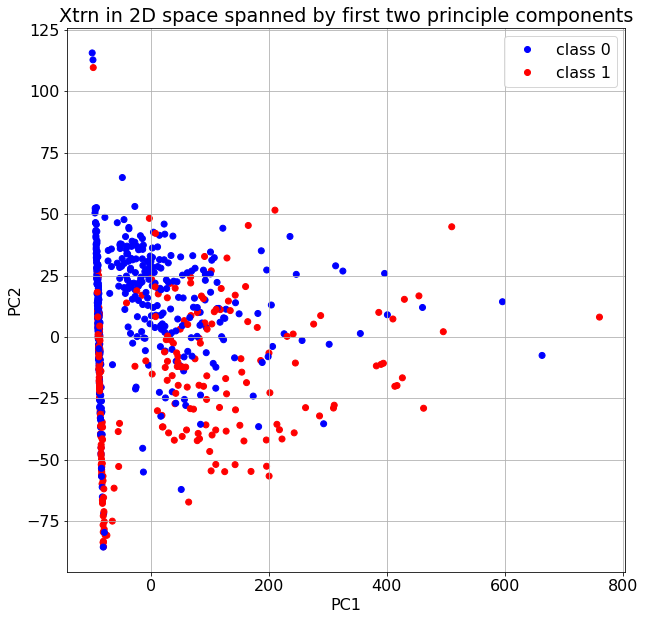

In [170]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10,10))

scatter = plt.scatter(projected[:,0], projected[:,1], c=Ytrn, cmap=ListedColormap(['b','r']) )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Xtrn in 2D space spanned by first two principle components')
plt.grid()
plt.legend(handles=scatter.legend_elements()[0], labels=['class 0', 'class 1'])
plt.show()

In [88]:
cors_pc1 = []
cors_pc2 = []



for i in range (0,9): 
    correlation = np.corrcoef(Xtrn[:,i], projected[:,0])[1,0]
    cors_pc1.append(correlation)

for i in range (0,9): 
    correlation = np.corrcoef(Xtrn[:,i], projected[:,1])[1,0]
    cors_pc2.append(correlation)

dfQ5d = pd.DataFrame(columns=['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'])
dfQ5d.loc['PC1'] = cors_pc1
dfQ5d.loc['PC2'] = cors_pc2
dfQ5d

,A0,A1,A2,A3,A4,A5,A6,A7,A8
PC1,0.385593,-0.045825,-0.057052,0.185793,0.459240,0.999678,0.100572,0.232302,-0.001574
PC2,-0.914289,-0.090773,-0.225463,-0.079872,0.097165,0.024085,-0.255392,-0.172606,-0.373444


In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(Xtrn)
Xtrn_s = scaler.transform(Xtrn)
Xtst_s = scaler.transform(Xtst)

# 1.6

In [90]:
# unbiased variance!!! 

pca_Q6 = PCA()
projected_Q6 = pca_Q6.fit_transform(Xtrn_s)
var_Q6 = pca_Q6.explained_variance_
sum(var_Q6)

9.012875536480692

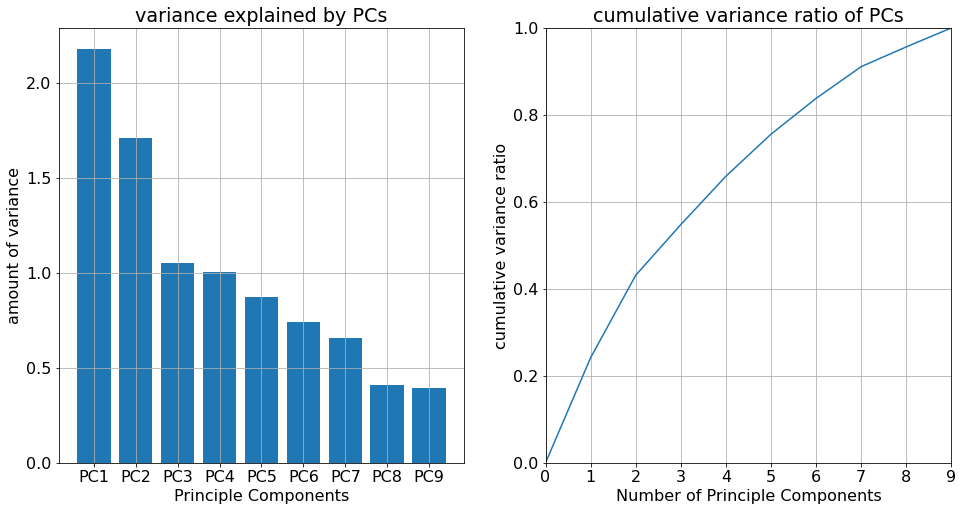

In [91]:
x_pc = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

cum_var_ratio_Q6 = pca_Q6.explained_variance_ratio_.cumsum()
cum_var_ratio_Q6 = np.insert(cum_var_ratio_Q6,0,0)
z_pc = range (0,10)

fig = plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.bar(x_pc, var_Q6)
plt.grid()
plt.xlabel('Principle Components')
plt.ylabel('amount of variance')
plt.title('variance explained by PCs')

plt.subplot(1, 2, 2)
plt.plot(z_pc, cum_var_ratio_Q6)
plt.grid()
plt.xlabel('Number of Principle Components')
plt.ylabel('cumulative variance ratio')
plt.title('cumulative variance ratio of PCs')
plt.xticks(z,z)
plt.ylim([0, 1])
plt.xlim([0,9])

plt.show()

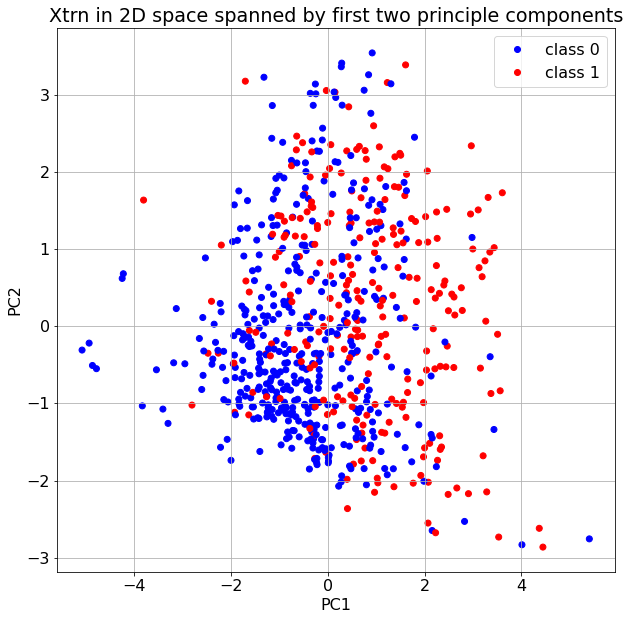

In [95]:
plt.figure(figsize=(10,10))
scatter = plt.scatter(projected_Q6[:,0], projected_Q6[:,1], c=Ytrn, cmap=ListedColormap(['b','r']))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Xtrn in 2D space spanned by first two principle components')
plt.grid()
plt.legend(handles=scatter.legend_elements()[0], labels=['class 0', 'class 1'])

plt.show()

In [96]:
cors_pc1_Q6 = []
cors_pc2_Q6 = []



for i in range (0,9): 
    correlation = np.corrcoef(Xtrn_s[:,i], projected_Q6[:,0])[1,0]
    cors_pc1_Q6.append(correlation)

for i in range (0,9): 
    correlation = np.corrcoef(Xtrn_s[:,i], projected_Q6[:,1])[1,0]
    cors_pc2_Q6.append(correlation)

dfQ6d = pd.DataFrame(columns=['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'])
dfQ6d.loc['PC1'] = cors_pc1_Q6
dfQ6d.loc['PC2'] = cors_pc2_Q6
dfQ6d

,A0,A1,A2,A3,A4,A5,A6,A7,A8
PC1,0.600671,0.057296,0.267952,0.365655,0.623038,0.629857,0.522851,0.651161,0.352864
PC2,0.177432,0.100037,0.759983,-0.207643,-0.465990,-0.369796,0.224228,-0.168450,0.781249


# 1.8

In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import validation_curve


param_range = np.logspace(-2, 2, num = 13)

    
train_scores, valid_scores = validation_curve(SVC(kernel='rbf'), Xtrn_s, Ytrn, 
                                              param_name = "C", param_range=param_range, cv=5)

# Find mean accuracy 
trn_mean = np.mean (train_scores, axis=1)

    
val_mean = np.mean (valid_scores, axis=1)

    
trn_std = np.std (train_scores, axis=1)

    
val_std = np.std (valid_scores, axis=1)


In [98]:
print (np.logspace(-2, 2, num=13))
print (val_mean)

[1.00000000e-02 2.15443469e-02 4.64158883e-02 1.00000000e-01
 2.15443469e-01 4.64158883e-01 1.00000000e+00 2.15443469e+00
 4.64158883e+00 1.00000000e+01 2.15443469e+01 4.64158883e+01
 1.00000000e+02]
[0.62571429 0.62571429 0.64285714 0.74857143 0.76       0.77428571
 0.76857143 0.76142857 0.74571429 0.75       0.72       0.72
 0.72142857]


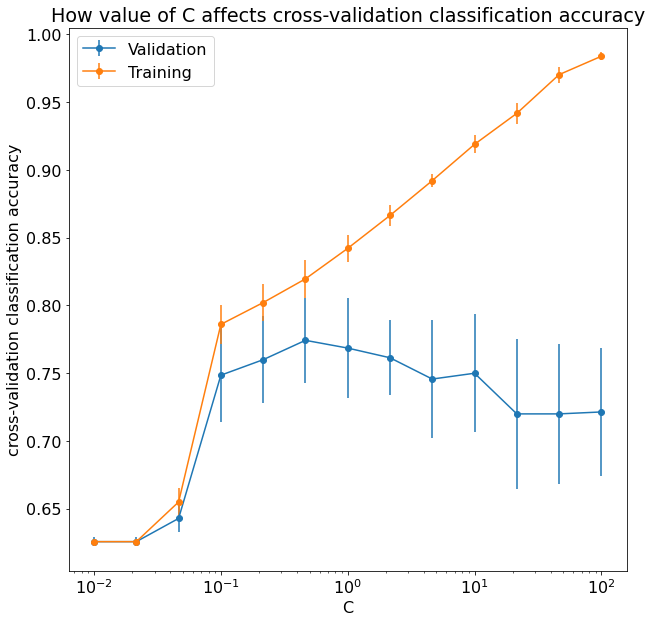

In [171]:
c = np.logspace(-2, 2, num=13)
plt.figure(figsize=(10,10))
plt.errorbar(c, val_mean, val_std, fmt='-o')
plt.errorbar(c, trn_mean, trn_std, fmt='-o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('cross-validation classification accuracy')
plt.title('How value of C affects cross-validation classification accuracy')
plt.legend(labels=['Validation', 'Training'])
plt.show()

In [104]:

svm_c = SVC(kernel='rbf', C=0.46415888336127775)
svm_c.fit(Xtrn_s, Ytrn)

# Classification accuracy on training set
preds_svm_trn = svm_c.predict(Xtrn_s)
print("Accuracy for TRAINING set:", sklearn.metrics.accuracy_score(Ytrn, preds_svm_trn))

# Classification accuracy on test set
preds_svm_tst = svm_c.predict(Xtst_s)
print("Accuracy for TEST set:", sklearn.metrics.accuracy_score(Ytst, preds_svm_tst))

print (len (Xtst_s[Ytst == preds_svm_tst]))

Accuracy for TRAINING set: 0.8142857142857143
Accuracy for TEST set: 0.75
75


# 1.9

In [105]:
idx0 = np.where(Ytrn == 0)
row4 = Xtrn[:,4][idx0]
row7 = Xtrn[:,7][idx0]
Ztrn_tuple = list (zip(row4, row7)) 
Ztrn_tuple_small = [t for t in Ztrn_tuple if t[0] >= 1]
Ztrn = np.transpose (np.array([*Ztrn_tuple_small]))
Ztrn_mean = np.mean(Ztrn, axis=1)
Ztrn_unbiased_cov = np.cov (Ztrn, ddof = 1)

print ("mean vector: ", Ztrn_mean)
print ("unbiased covariance matrix: ")
print (Ztrn_unbiased_cov)


mean vector:  [27.0209434  31.09320755]
unbiased covariance matrix: 
[[95.14113475 41.46999034]
 [41.46999034 46.69341618]]


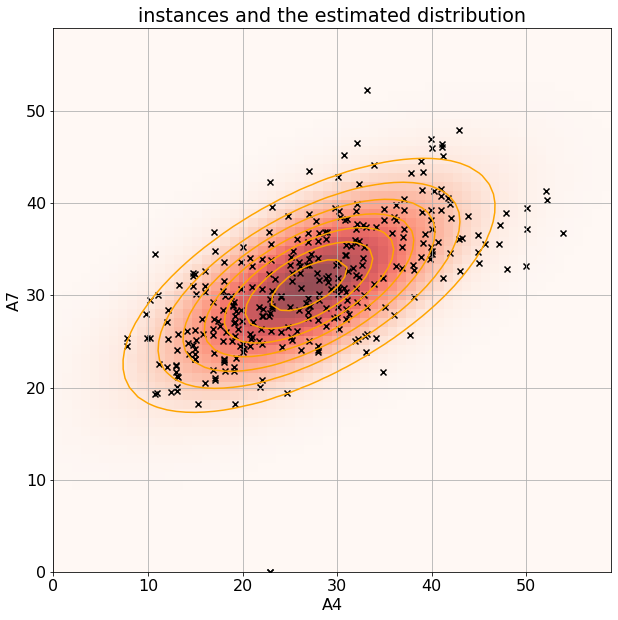

In [149]:
x = Ztrn[0]
y = Ztrn[1]



pdf = np.zeros([60,60])
nums = [k for k in range(60)]

for i in range(60): 
    for j in range(60): 
        pdf[i,j] = multivariate_normal.pdf([j,i], mean = Ztrn.mean(axis = 1), cov = np.cov(Ztrn))

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x,y, marker = 'x', color = 'k')
ax.grid()
ax.set_xlabel('A4')
ax.set_ylabel('A7')
ax.set_title('instances and the estimated distribution')
ax.pcolorfast(nums, nums, pdf, alpha=0.7, cmap='Reds')
ax.contour(nums, nums, pdf, colors = 'orange')


# 1.10

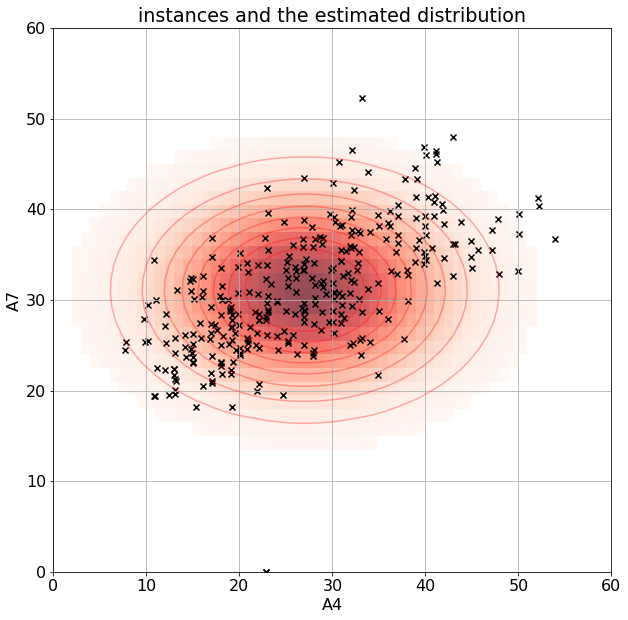

In [172]:


xlim = (0, 60)
ylim = (0, 60)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

mu, std = Ztrn.mean(1), Ztrn.std(1)
P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
Pm = np.ma.masked_array(P, P < 0.03)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Ztrn[0], Ztrn[1], marker = 'x', color = 'k')
ax.grid()
ax.set_xlabel('A4')
ax.set_ylabel('A7')
ax.set_title('instances and the estimated distribution')
ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.7,
                  cmap='Reds')
ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], 
               colors='r', alpha=0.3)

# plt.show()

In [157]:
np.diag(np.diag(Ztrn_unbiased_cov))

array([[95.14113475,  0.        ],
       [ 0.        , 46.69341618]])